In [33]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np

In [6]:
style.use('ggplot')

start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()

In [7]:
df = web.DataReader("TSLA", 'yahoo', start, end)
df_tesla = pd.DataFrame(df.Close)

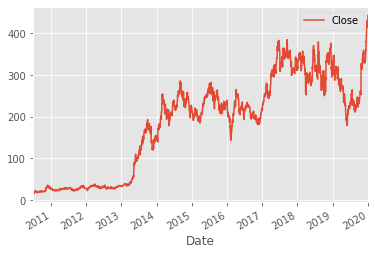

In [16]:
df_tesla.plot()

In [13]:
df_tesla.pct_change().mean()*100

Close    0.174144
dtype: float64

In [18]:
daily_return_tesla = df_tesla.pct_change()

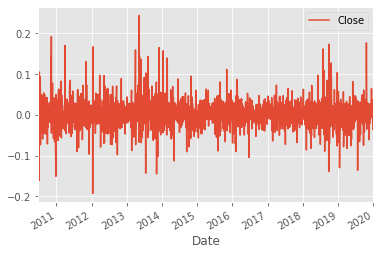

In [20]:
daily_return_tesla.plot()

In [23]:
daily_return_tesla.describe()

,Close
count,2395.000000
mean,0.001741
std,0.032434
min,-0.193274
25%,-0.014330
50%,0.000845
75%,0.017887
max,0.243951


In [25]:
(((daily_return_tesla+1).prod() - 1)*100).round(2)

Close    1754.37
dtype: float64

## Annualization

In [26]:
rm = 0.01
(1 + rm)**12 - 1 

0.12682503013196977

In [27]:
rq = 0.04
(1 + rq)**4 - 1

0.1698585600000002

In [31]:
yearly_return_tesla = (1+daily_return_tesla.mean())**252 - 1
(yearly_return_tesla*100).round(2)

Close    55.03
dtype: float64

## Volatility

In [36]:
sigma_d = daily_return_tesla.std()
sigma_a = sigma_d*np.sqrt(252)
print(sigma_d)

Close    0.032434
dtype: float64


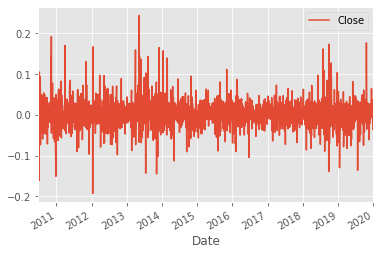

In [37]:
daily_return_tesla.plot.line()

In [45]:
daily_return_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2396 entries, 2010-06-29 to 2020-01-03
Data columns (total 1 columns):
Close    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


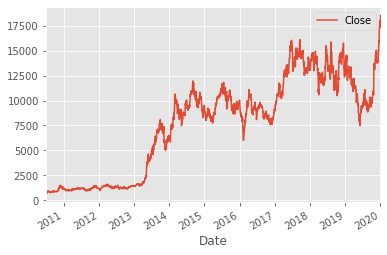

In [49]:
wealth_index_tesla = 1000*(1 + daily_return_tesla.dropna()).cumprod()
wealth_index_tesla.plot()

In [50]:
previous_peaks = wealth_index_tesla.cummax()

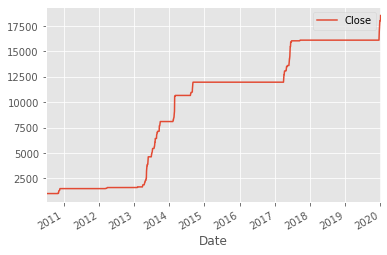

In [51]:
previous_peaks.plot()

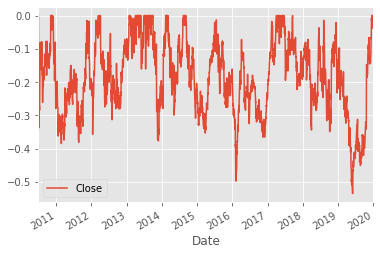

In [52]:
drawdown = (wealth_index_tesla - previous_peaks)/previous_peaks
drawdown.plot()

In [62]:
def drawdown(ticket, start, end):
    df = web.DataReader(ticket, 'yahoo', start, end)
    df = pd.DataFrame(df.Close)
    daily_return = df.pct_change().dropna()
    annual_return = (1 + daily_return.mean())**252 - 1
    daily_volatility = daily_return_tesla.std()
    annual_volatility = daily_volatility * np.sqrt(252)
    print("The annual return is: ", annual_return)
    wealth_index = 1000*(1 + daily_return).cumprod()
    previous_peaks = wealth_index.cummax()
    percent_drawdown = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index})

In [63]:
drawdown('TSLA', start, end)

The annual return is:  Close    0.550321
dtype: float64


ValueError: If using all scalar values, you must pass an index